##                                          Advanced Lane Finding Project

The goals/steps of this project are the following:
    - Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
    - Apply a distortion correction to raw images.
    - Use color transforms, gradients, etc., to create a thresholded binary image.
    - Apply a perspective transform to rectify binary image.
    - Detect lane pixels and fit to find the lane boundary.
    - Determine the curvature of the lane and vehicle position with respect to center.
    - Warp the detected lane boundaries back onto the original image.
    - Output visual display of the boundaries and numerical estimation of lane curvature and position.


## Camera Calibration using chessboard images

In [1]:
# import packages
import glob
from codes.preprocessing import *
import os
import matplotlib.image as mpimg

ModuleNotFoundError: No module named 'codes'

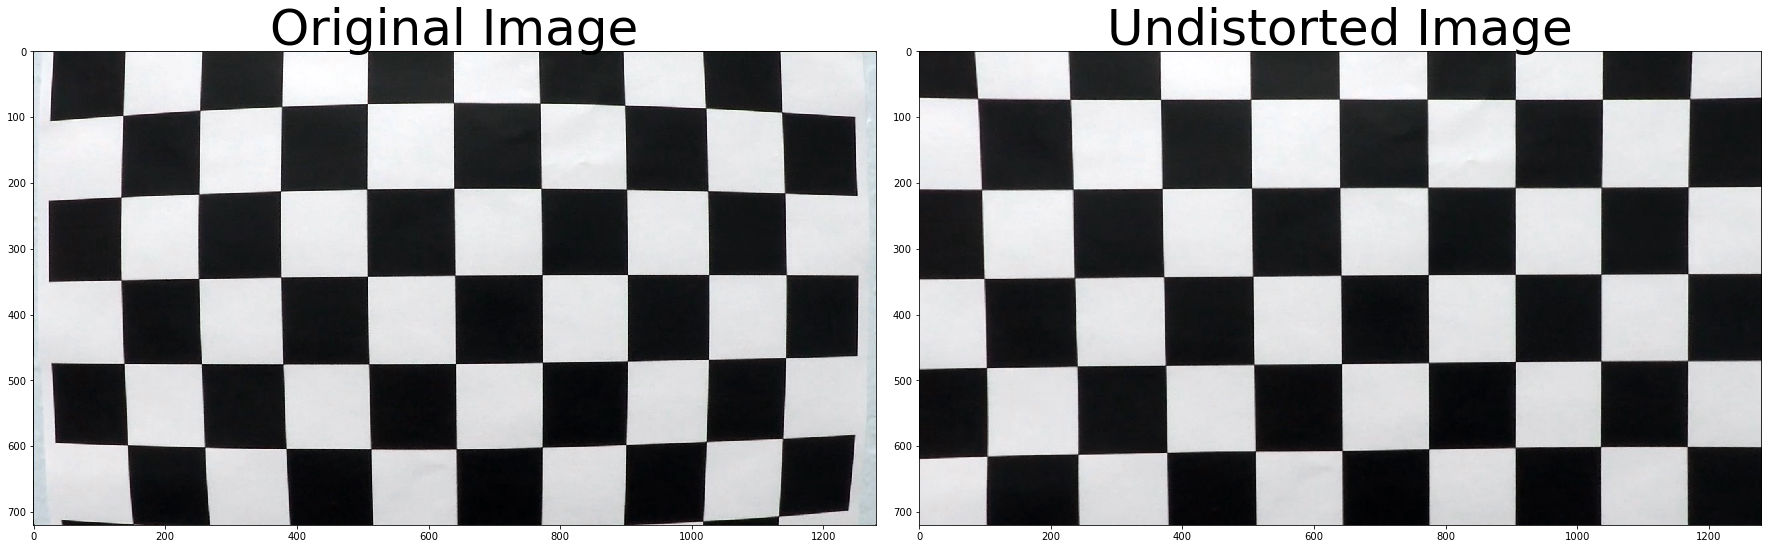

In [2]:
# define params
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# get the chessboard images
images = glob.glob('camera_calibration/calibration*.jpg')

# calculate the object points and image points
objpoints, imgpoints = get_img_obj_points(images, nx, ny)

# save object points and image points for future use
create_pickle_file(objpoints, imgpoints)

# get the object points and image points
dist_pickle = pickle.load( open( "wide_dist.pickle", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Undistort an image using object points and image points 
img = images[0]
img = cv2.imread(img)
undistorted_img = np.copy(img)
ret, mtx, dist, rvecs, tvecs = calibrate_camera(undistorted_img, objpoints, imgpoints)
undistort_img = undistort_image(undistorted_img, mtx, dist)

# plot the distorted vs undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistort_img)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Correct distortion on road images

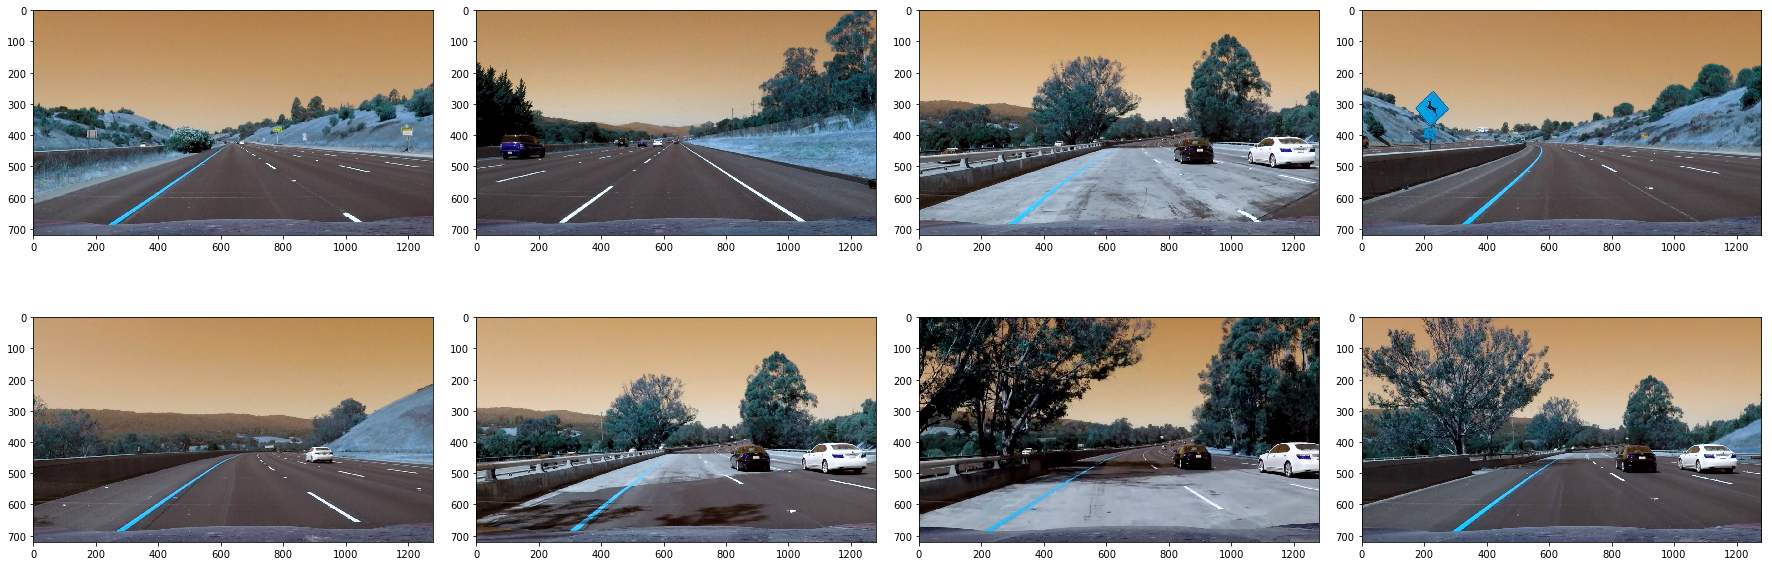

In [3]:
# get the test images
test_images = []
for image in glob.glob('test_images/*.jpg'):
    test_images.append(image)

f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(test_images)//2
for i in range(len(test_images)//2):
    ax1[i].imshow(cv2.imread(test_images[i]))
    ax2[i].imshow(cv2.imread(test_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

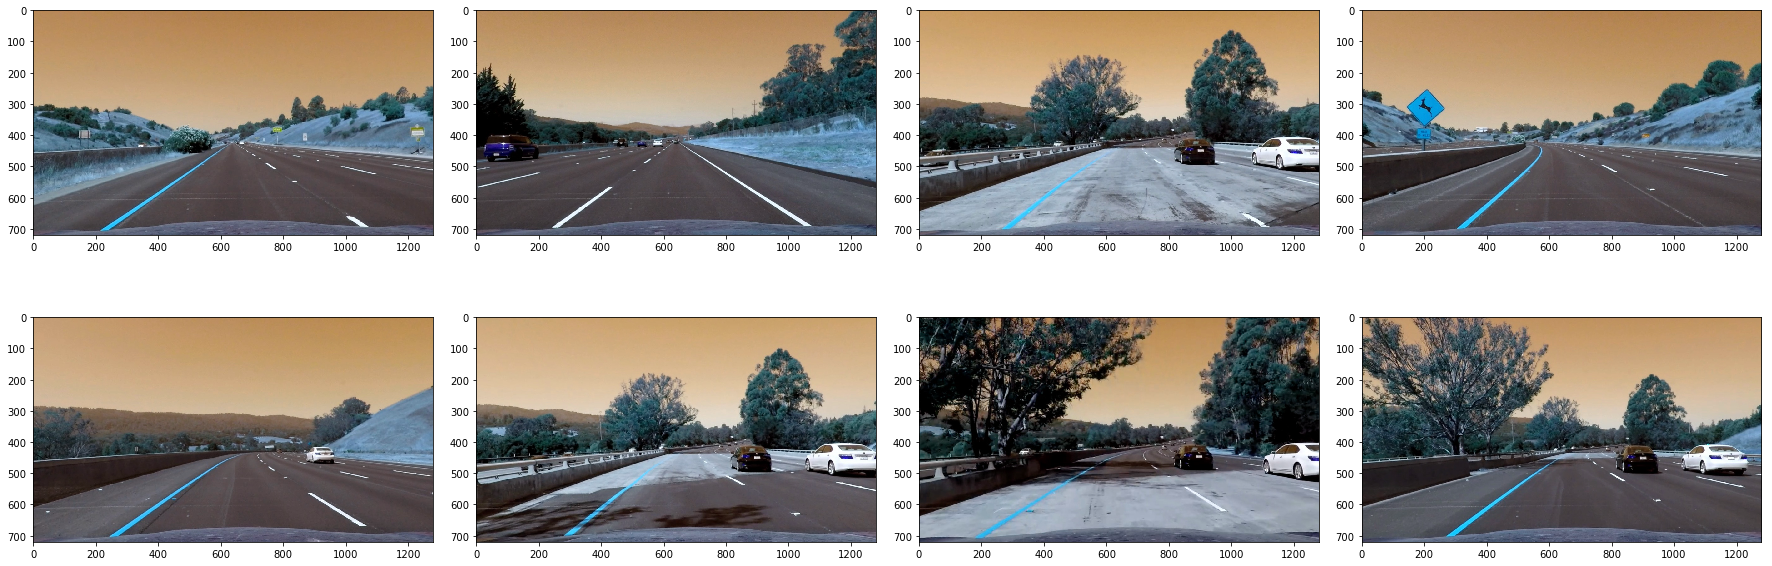

In [4]:
# correct distortion
for image in test_images:
    img = cv2.imread(image)
    img = np.copy(img)
    ret, mtx, dist, rvecs, tvecs = calibrate_camera(img, objpoints, imgpoints)
    img = undistort_image(img, mtx, dist)
    cv2.imshow('img', img)
    file_img = image.split('/')[1]
    file_path = os.path.join('output_images/undistorted_images/',file_img)
    cv2.imwrite(file_path, img)
    
undistorted_images = []
for image in glob.glob('output_images/undistorted_images/*.jpg'):
    undistorted_images.append(image)
    
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(undistorted_images)//2
for i in range(len(undistorted_images)//2):
    ax1[i].imshow(cv2.imread(undistorted_images[i]))
    ax2[i].imshow(cv2.imread(undistorted_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Color Transform and gradient transform

In [5]:
i = 0
for image in undistorted_images:
    i += 1
    img = cv2.imread(image)
    img = np.copy(img)
    result = pipeline(img, s_thresh=(170, 255), sx_thresh=(10, 100))
    result = result
    file_img = image.split('/')[2] 
    file_path = os.path.join('output_images/transform/',file_img)
    cv2.imwrite(file_path, result)
    

In [6]:
transformed_images = []
for image in glob.glob('output_images/transform/*'):
    transformed_images.append(image)

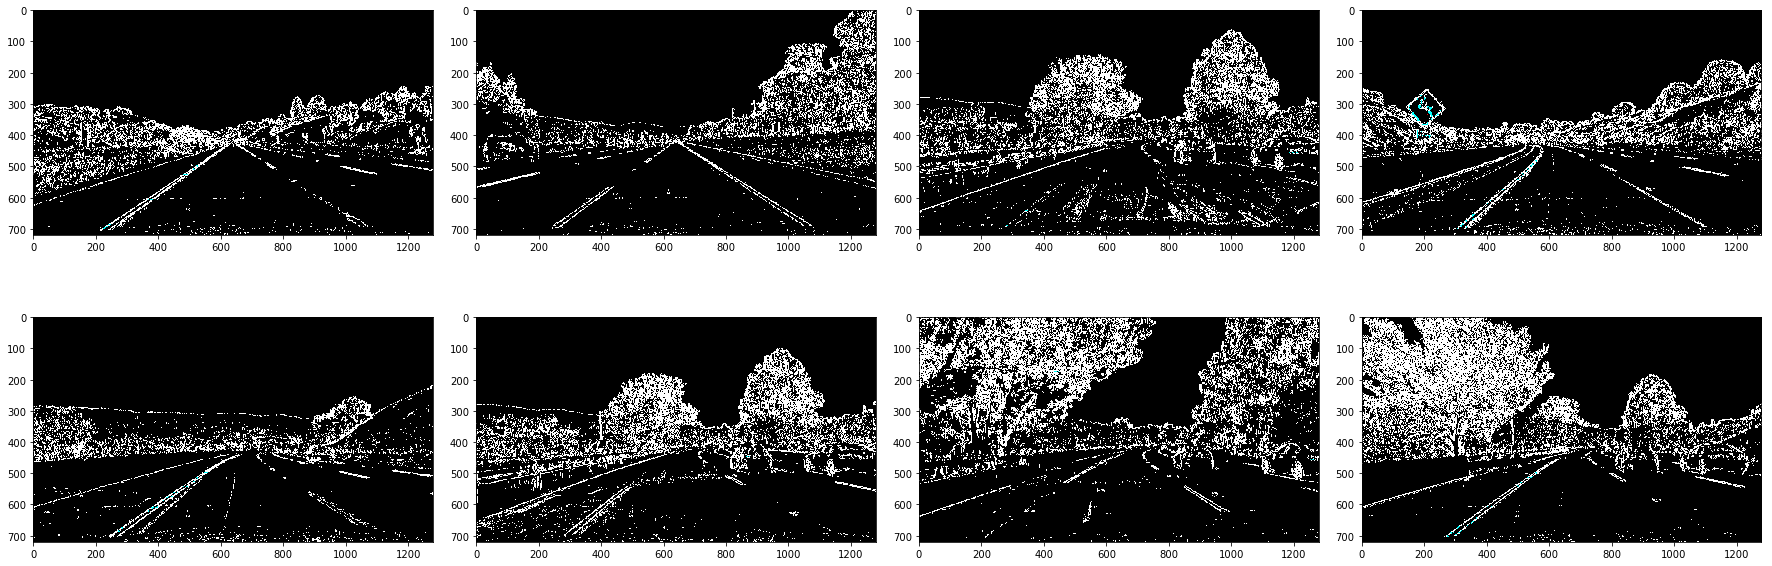

In [7]:
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(transformed_images)//2
for i in range(len(transformed_images)//2):
    ax1[i].imshow(cv2.imread(transformed_images[i])*255)
    ax2[i].imshow(cv2.imread(transformed_images[half + i])*255)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Perspective Transform

In [8]:
for image in transformed_images:
    img = cv2.imread(image)
    img = np.copy(img)
    img_size = (img.shape[1], img.shape[0])
    src = np.float32(
            [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
             [((img_size[0] / 6) - 10), img_size[1]],
             [(img_size[0] * 5 / 6) + 60, img_size[1]],
             [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
    dst = np.float32(
            [[(img_size[0] / 4), 0],
             [(img_size[0] / 4), img_size[1]],
             [(img_size[0] * 3 / 4), img_size[1]],
             [(img_size[0] * 3 / 4), 0]])
    matrix = perspective_transform(src, dst)
    result = warp_image(img*255, matrix, img_size , flags=cv2.INTER_LINEAR)
    file_img = image.split('/')[2] 
    file_path = os.path.join('output_images/warped_images/',file_img)
    cv2.imwrite(file_path, result) 

In [9]:
warped_images = []
for image in glob.glob('output_images/warped_images/*.jpg'):
    warped_images.append(image)

In [10]:
warped_images

['output_images/warped_images/straight_lines1.jpg',
 'output_images/warped_images/straight_lines2.jpg',
 'output_images/warped_images/test1.jpg',
 'output_images/warped_images/test2.jpg',
 'output_images/warped_images/test3.jpg',
 'output_images/warped_images/test4.jpg',
 'output_images/warped_images/test5.jpg',
 'output_images/warped_images/test6.jpg']

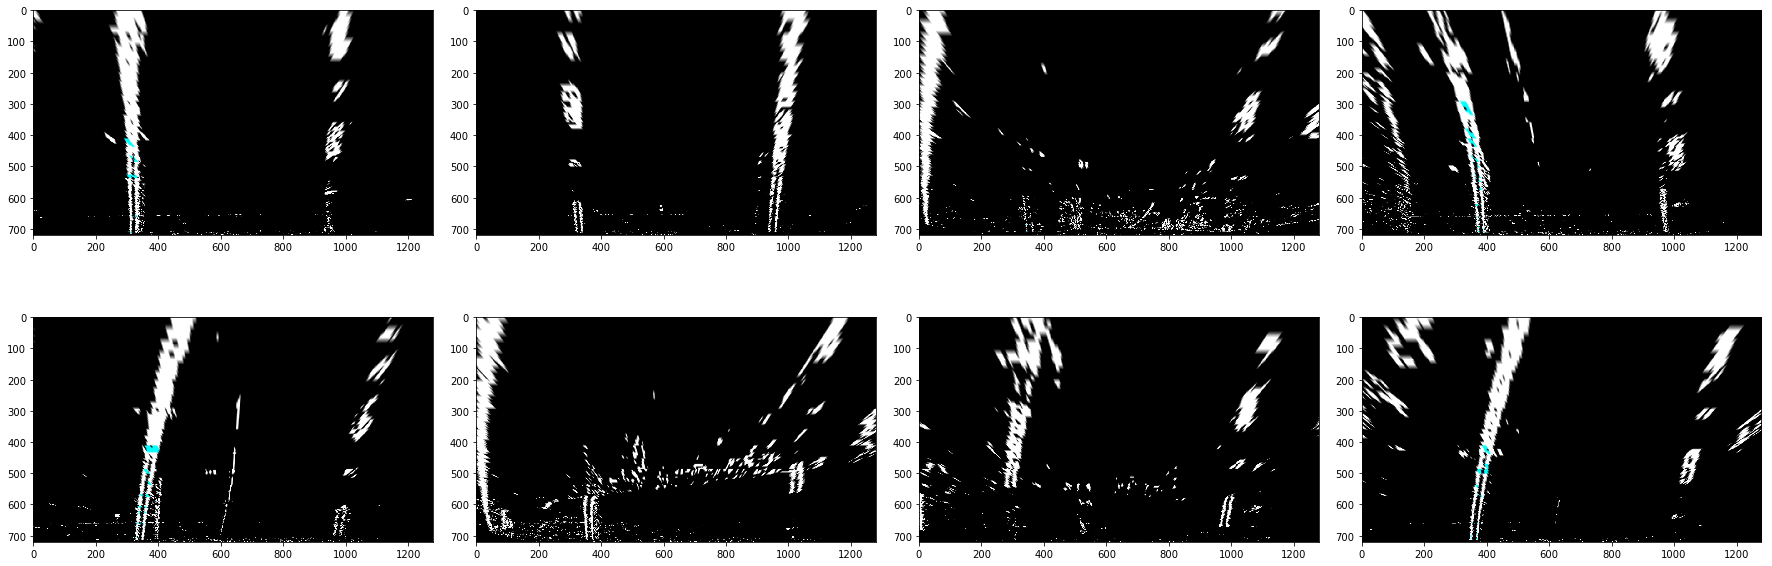

In [11]:
f, (ax1, ax2) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
half = len(warped_images)//2
for i in range(len(warped_images)//2):
    ax1[i].imshow(cv2.imread(warped_images[i]))
    ax2[i].imshow(cv2.imread(warped_images[half + i]))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Detect lane pixels 

#### Histogram of pixel

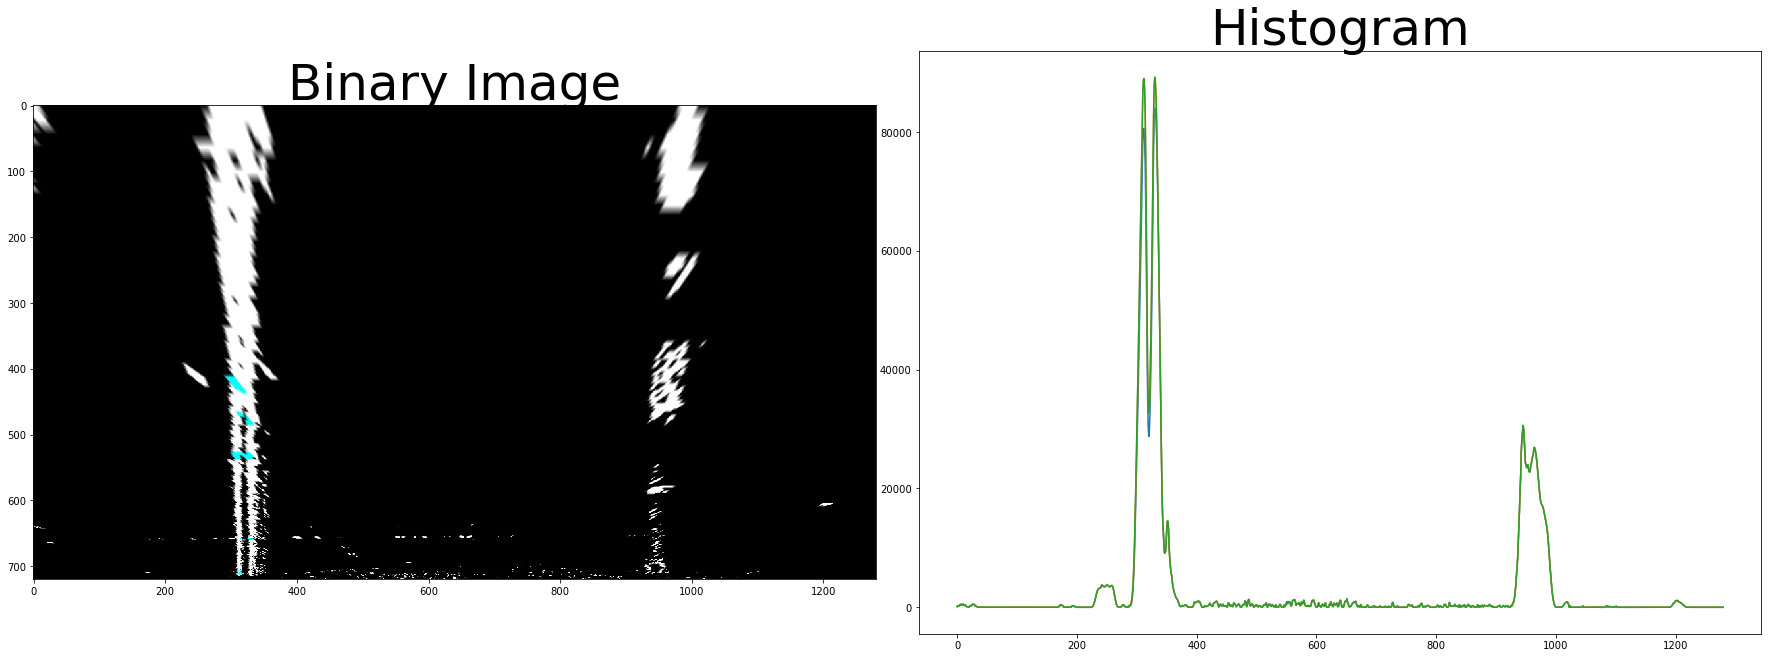

In [12]:
img = cv2.imread(warped_images[0])
h = hist(img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Binary Image', fontsize=50)
ax2.plot(h)
ax2.set_title('Histogram', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

#### Sliding Windows

In [13]:
img = cv2.imread(warped_images[0])
out_img, left_fit, right_fit, left_fit_cr, right_fit_cr = fit_polynomial(img[:, :, 0])

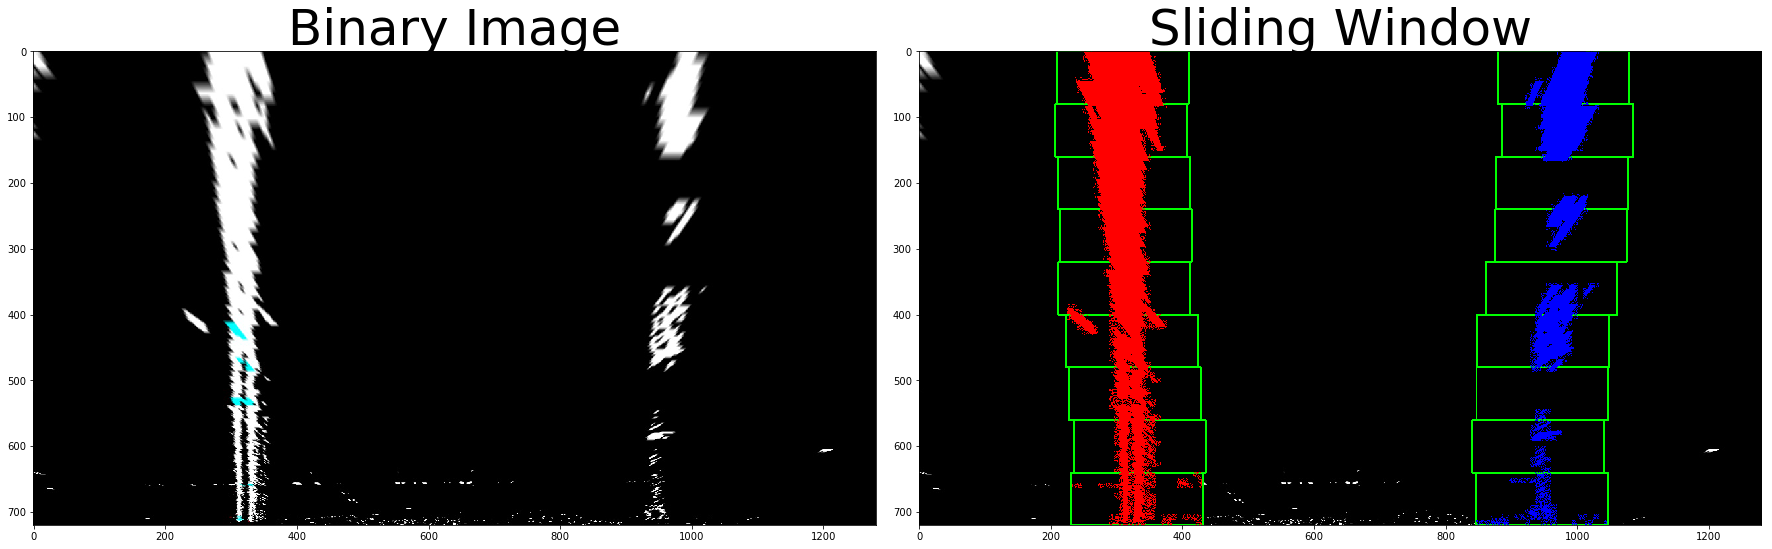

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Binary Image', fontsize=50)
ax2.imshow(out_img)
ax2.set_title('Sliding Window', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

#### Fit pixel lane

In [15]:
ploty = np.linspace(0, img[:, :, 0].shape[0] - 1, img[:, :, 0].shape[0])
left_fitx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
right_fitx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]

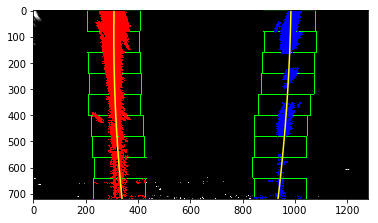

In [16]:
plot_polynomial(img[:, :, 0], out_img, left_fit, right_fit)

### Determine the curvature of the lane and vehicle position with respect to center

In [18]:
curvature, offset = calculate_curvature_offset(img[:, :, 0], left_fit_cr, right_fit_cr, ym_per_pix = 30/720)

In [19]:
print('Curvature: ', curvature)
print('Offset: ', offset)

Curvature:  2196.17661102
Offset:  -0.0164908891876


### Warp the detected lane boundaries back onto the original image, display the image with numerical estimation of lane curvature and vehicle position

In [20]:
image = cv2.imread(test_images[0])
matrix = inverse_perspective_transform(src, dst)

In [31]:
 ploty = np.linspace(0, img[:, :, 0].shape[0] - 1, img[:, :, 0].shape[0])

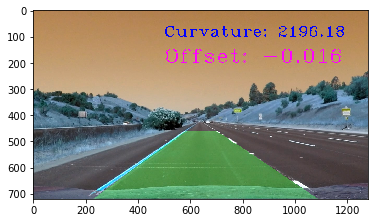

In [33]:
#warp_zero = np.zeros_like(warped).astype(np.uint8)
#color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
color_warp = img
# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, matrix, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
curvature = np.round(curvature, 2)
offset = np.round(offset, 3)
text1 = 'Curvature: ' + str(curvature)
text2 = 'Offset: ' + str(offset)
cv2.putText(result,text1,(500,100), 5, 3,(0,0,255),2)
cv2.putText(result,text2,(500,200), 5, 4,(255,0,255),2)
plt.imshow(result)
plt.show()

### Video